In [1]:
from rdkit import Chem
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, ShuffleSplit, GridSearchCV, cross_val_score, cross_validate
import os
import glob
from scipy.stats import norm
import math
import random

/home/rdkit/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Read the data  读入撞击感度数值
T_0 = pd.read_excel('IRRAK4y.xlsx')
T=np.array(T_0)
from sklearn import preprocessing  
#min_max_scaler = preprocessing.MinMaxScaler() 
#T=T_minMax = min_max_scaler.fit_transform(T)
#T=T.ravel()
print(T)  
print(len(T))


[[10.66]
 [10.  ]
 [ 9.7 ]
 ...
 [ 4.52]
 [ 4.52]
 [ 4.26]]
1628


In [3]:
#读入特征    1000种描述符数据 
X=pd.read_excel('IRRAK4x1.xlsx')
X=np.array(X)
from sklearn import preprocessing  
#min_max_scaler = preprocessing.MinMaxScaler() 
#X=X_minMax = min_max_scaler.fit_transform(X)
print(X)
print(len(X[0]))
print(len(X))

[[ 0  0  1 ...  0  0 34]
 [ 1  1  1 ...  0  0 32]
 [ 0  0  1 ...  0  0 16]
 ...
 [ 0  0  1 ...  0  0 17]
 [ 0  0  1 ...  0  0 16]
 [ 0  0  0 ...  0  0  8]]
1331
1628


In [ ]:
# 12 

In [19]:
from sklearn.model_selection import train_test_split
X_train,  X_test,  T_train,  T_test  =  train_test_split(X,T,test_size=0.10,random_state=11)

In [20]:
test_y = T_test
test_x = X_test

In [21]:
cv_x = X_train
cv_y = T_train

In [ ]:
from sklearn.metrics import r2_score
import lightgbm as lgb

cv_scores = []
test_scores = []
pred_valid = []
pred_test = []
MAE_scores = []
RMSE_scores = []

kf = KFold(n_splits=10, shuffle=True, random_state=725)
for train_ix, valid_ix in kf.split(cv_x):
    train_x = cv_x[train_ix]
    valid_x = cv_x[valid_ix]
    train_y = cv_y[train_ix]
    valid_y = cv_y[valid_ix]
    regressor = lgb.LGBMRegressor(n_estimators=200)
    regressor.fit(train_x,train_y)
    lgb.LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                       importance_type='split', learning_rate=0.1, max_depth=-1,feature_fraction=0.6,bagging_fraction=0.6,
                       min_child_samples=10, min_child_weight=0.1, min_split_gain=0.0,
                       n_estimators=240, n_jobs=-1, objective='regression', num_leaves=30,
                       random_state=None, reg_alpha=0.6, reg_lambda=0.0, silent=True,
                       subsample=0.6, subsample_for_bin=200000, subsample_freq=0)
    val_results = regressor.predict(valid_x)
    pred_valid.append(val_results)
    valid_score = r2_score(valid_y,val_results)
    cv_scores.append(valid_score)
    
    test_results = regressor.predict(test_x)
    pred_test.append(test_results)
    test_score = r2_score(test_y,test_results)
    test_scores.append(test_score)
    y_true=test_y

    MAE_score = mean_absolute_error(test_y, test_results)
    MAE_scores.append(MAE_score)
    
    RMSE_score = np.sqrt(mean_squared_error(test_y, test_results))
    RMSE_scores.append(RMSE_score)

/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

In [ ]:
print('test: {:.3f}+-{:.3f}'.format(np.array(test_scores).mean(), np.array(test_scores).std()))
print('test: {:.3f}+-{:.3f}'.format(np.array(MAE_scores).mean(), np.array(MAE_scores).std()))
print('test: {:.3f}+-{:.3f}'.format(np.array(RMSE_scores).mean(), np.array(RMSE_scores).std()))

In [ ]:
# 11 IRAK4数据

In [4]:
from sklearn.model_selection import train_test_split
X_train,  X_test,  T_train,  T_test  =  train_test_split(X,T,test_size=0.10,random_state=11)

In [5]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
plt.style.use('ggplot')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

regressor = lgb.LGBMRegressor(n_estimators=200)
regressor.fit(X_train,T_train)
lgb.LGBMRegressor(boosting_type='gbdt', class_weight=0.5, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.01, max_depth=4,
       min_child_samples=1, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=900, n_jobs=-1, num_leaves=31,random_state=42, reg_alpha=0.01, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMRegressor(class_weight=0.5, learning_rate=0.01, max_depth=4,
              min_child_samples=1, n_estimators=900, random_state=42,
              reg_alpha=0.01)

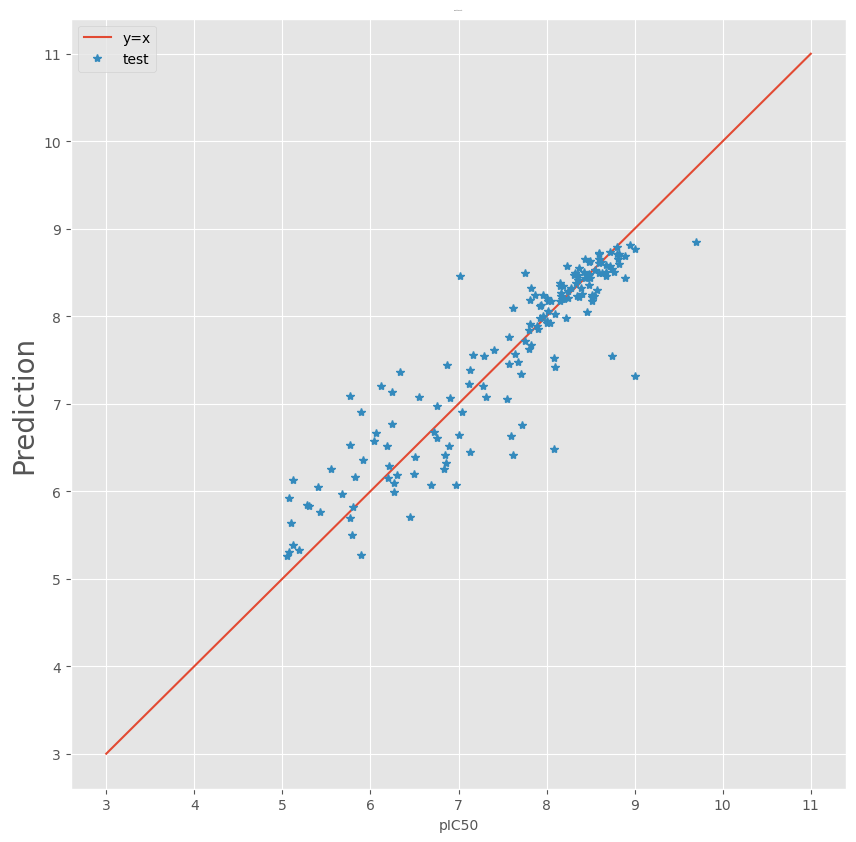

In [6]:
import matplotlib.pyplot as plt

y_true_test=T_test
y_pred_test=regressor.predict(X_test)
legend=["y=x","test"]
fig = plt.figure(figsize=(10,10))
plt.plot(range(3,12), range(3,12),"-")
plt.plot(y_true_test, y_pred_test,"*")
plt.xlabel("pIC50", fontsize=10)
plt.ylabel('Prediction', fontsize=20)
plt.legend(legend,fontsize=10)
plt.title('Scatter Plot', fontsize=1)
plt.show()

In [7]:
from sklearn.metrics import r2_score
print ("测试集 r^2 score",r2_score(T_test,y_pred_test))

测试集 r^2 score 0.8291571917745868


In [8]:
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_true=T_test
#y_pred=regressor.predict(X_test)
mean_absolute_error(y_true, y_pred_test)
#np.sqrt(mean_squared_error(y_true,y_pred))

0.31740488077367296

In [9]:
np.sqrt(mean_squared_error(y_true,y_pred_test))

0.4595262280833075

<Figure size 1000x1000 with 0 Axes>

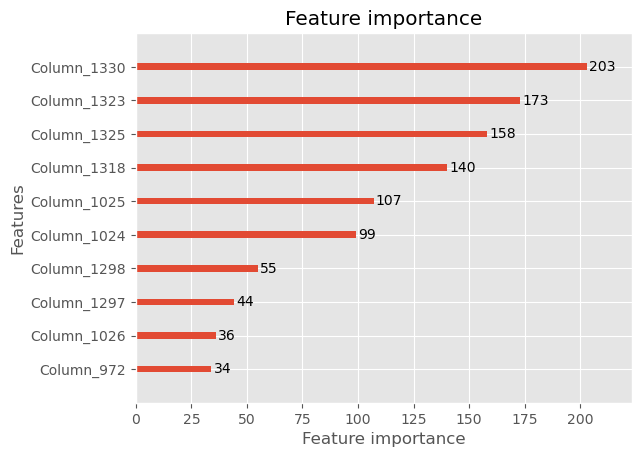

In [10]:
from lightgbm import plot_importance
# 显示重要特征
fig = plt.figure(figsize=(10,10))
plot_importance(regressor,max_num_features=10)
plt.show()

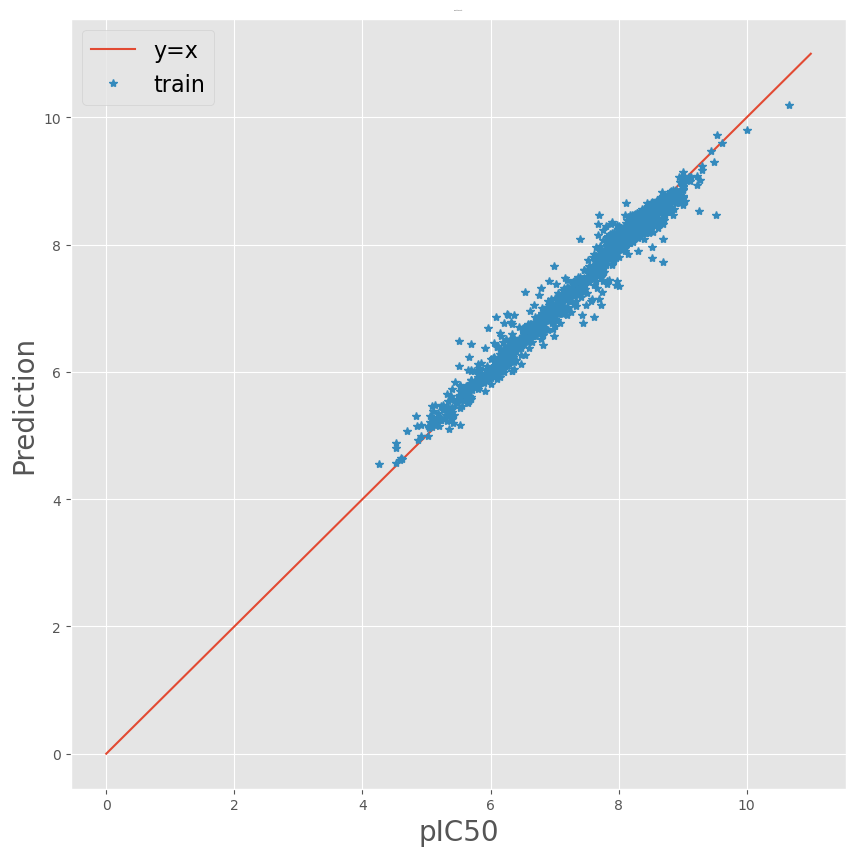

In [11]:
#查看散点图
import matplotlib.pyplot as plt
y_true_train=T_train
y_pred_train=regressor.predict(X_train)

legend=["y=x","train"]
fig = plt.figure(figsize=(10,10))
plt.plot(range(0,12), range(0,12),"-")
plt.plot(y_true_train, y_pred_train,"*")
plt.xlabel("pIC50", fontsize=20)
plt.ylabel('Prediction', fontsize=20)
plt.legend(legend,fontsize=16)
plt.title('Scatter Plot', fontsize=1)
plt.show()

In [12]:
from sklearn.metrics import r2_score
print ("训练集 r^2 score",r2_score(T_train,y_pred_train))

训练集 r^2 score 0.9753619957052472


In [13]:
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_true=T_train
y_pred=regressor.predict(X_train)
mean_absolute_error(y_true, y_pred)
#np.sqrt(mean_squared_error(y_true,y_pred))

0.11318601535565341

In [14]:
np.sqrt(mean_squared_error(y_true,y_pred))

0.16893908837265376

In [14]:
y_pred_train=regressor.predict(X_train)
df=pd.DataFrame(y_pred_train)
df.to_csv("./PLQY/resulttrainEMPreLGB77E.csv",index=False,header=False)
y_true=T_train
df=pd.DataFrame(y_true)
df.to_csv("./PLQY/resulttrainEMTrueLGB77E.csv",index=False,header=False)

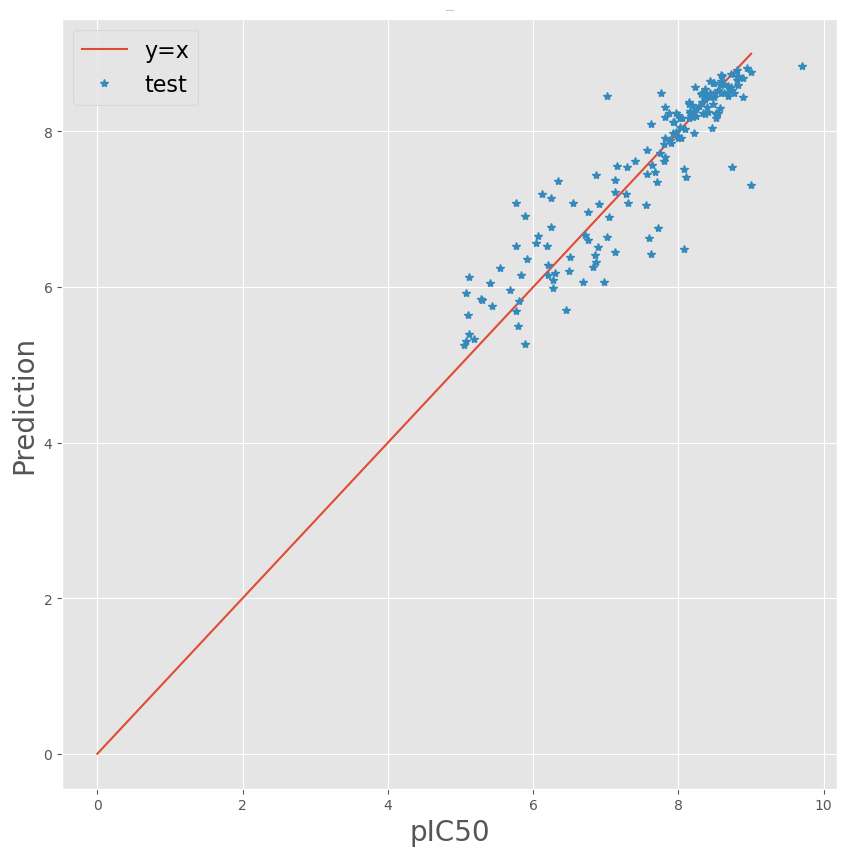

In [15]:
import matplotlib.pyplot as plt

y_true_test=T_test
#y_pred_test=regressor.predict(X_test)
legend=["y=x","test"]
fig = plt.figure(figsize=(10,10))
plt.plot(range(0,10), range(0,10),"-")
plt.plot(y_true_test, y_pred_test,"*")
plt.xlabel("pIC50", fontsize=20)
plt.ylabel('Prediction', fontsize=20)
plt.legend(legend,fontsize=16)
plt.title('Scatter Plot', fontsize=1)
plt.show()

In [16]:
from sklearn.metrics import r2_score
print ("测试集 r^2 score",r2_score(T_test,y_pred_test))

测试集 r^2 score 0.8291571917745868


In [17]:
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_true=T_test
#y_pred=regressor.predict(X_test)
mean_absolute_error(y_true, y_pred_test)
#np.sqrt(mean_squared_error(y_true,y_pred))

0.31740488077367296

In [18]:
np.sqrt(mean_squared_error(y_true,y_pred_test))

0.4595262280833075

In [20]:
y_pred_test=regressor.predict(X_test)
df=pd.DataFrame(y_pred_test)
df.to_csv("./PLQY/resulttestEMPreLGB77E.csv",index=False,header=False)
y_true=T_test
df=pd.DataFrame(y_true)
df.to_csv("./PLQY/resulttestEMTrueLGB77E.csv",index=False,header=False)

In [44]:
#读入特征    描述符数据 
Z=pd.read_excel('IRAK4YZ.xlsx')
Z=np.array(Z)
from sklearn import preprocessing  
#min_max_scaler = preprocessing.MinMaxScaler() 
#Z=Z_minMax = min_max_scaler.fit_transform(Z)
print(Z)
print(len(Z[0]))
print(len(Z))

[[ 0  0  0 ...  0  0 14]
 [ 0  0  1 ...  0  0 17]
 [ 0  0  1 ...  0  0 14]
 ...
 [ 0  0  1 ...  0  0 15]
 [ 0  0  1 ...  0  0 19]
 [ 0  0  1 ...  0  0 19]]
1331
90


In [45]:
Z_predict = regressor.predict(Z)
print(Z_predict)

[7.85328372 7.0746534  7.66530911 7.25033702 7.3251393  7.10600002
 7.76616156 7.03956134 7.03956134 7.5247092  6.94066242 6.98653447
 7.03956134 7.192463   7.12958437 8.34446533 6.85366224 7.40972999
 7.5018967  7.15782769 7.02028111 7.76616156 7.03876763 7.01754573
 7.59438918 7.10001955 7.12862449 7.12958437 7.10380379 6.93243945
 8.30463879 6.91937488 8.19754314 6.80248646 8.22983553 6.65947727
 7.68973755 6.75180571 7.70696753 6.69247658 7.97576522 7.86003692
 7.95545049 8.01840042 7.25213432 7.94498948 8.09885253 6.56870144
 7.28334457 7.56662288 7.11799449 6.55437621 8.09885253 7.51747684
 7.88585232 7.88585232 7.18361813 7.40209273 6.77256948 7.94752557
 6.94972422 7.43557423 7.73478839 7.44252972 7.44427637 7.48313466
 7.48274575 7.57790436 7.64838779 7.65335872 8.02657818 7.9005075
 7.42790405 7.49566704 7.92711565 7.68613162 7.67711637 7.57489536
 7.61542666 7.93390828 7.90295148 7.85530169 8.00401528 7.81209205
 6.98068658 6.89927598 6.73484237 6.64951806 7.13639441 6.87743

In [46]:
df=pd.DataFrame(Z_predict)
df.to_csv("./resultEMISSIONHGSJ2021LGBMsrksA.csv",index=False,header=False)

In [105]:
from sklearn.neighbors import KNeighborsRegressor
clf = KNeighborsRegressor (n_neighbors=4)
clf.fit (X_train,T_train)
train=clf.score(X_train,T_train)
test=clf.score(X_test, T_test)

In [122]:
from xgboost import XGBRegressor
clf = XGBRegressor(n_estimators=200)
clf.fit(X_train,T_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [117]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor (
bootstrap=True, criterion='mse', max_depth=None,
max_features='auto', max_leaf_nodes=None,
min_samples_leaf=1, min_samples_split=2,
min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
oob_score=False, random_state=None, verbose=0, warm_start=False)
clf.fit (X_train,T_train)
train=clf.score(X_train,T_train)
test=clf.score(X_test, T_test)

/tmp/ipykernel_11785/3083782093.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit (X_train,T_train)
/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


In [157]:
clf_x_predict = clf.predict(X_train)
clf_y_predict = clf.predict(X_test)

In [5]:
from sklearn.svm import SVC  # Support Vector Classifier
clf = SVC(kernel='linear') # 线性核函数
clf.fit(X_train,T_train)
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

/PUBLIC/zyh/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: 'continuous'

In [12]:
from sklearn.svm import SVR
clf = SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.000001, gamma=1e-2,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
clf.fit(X_train,T_train)

/PUBLIC/zyh/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=1e-06, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

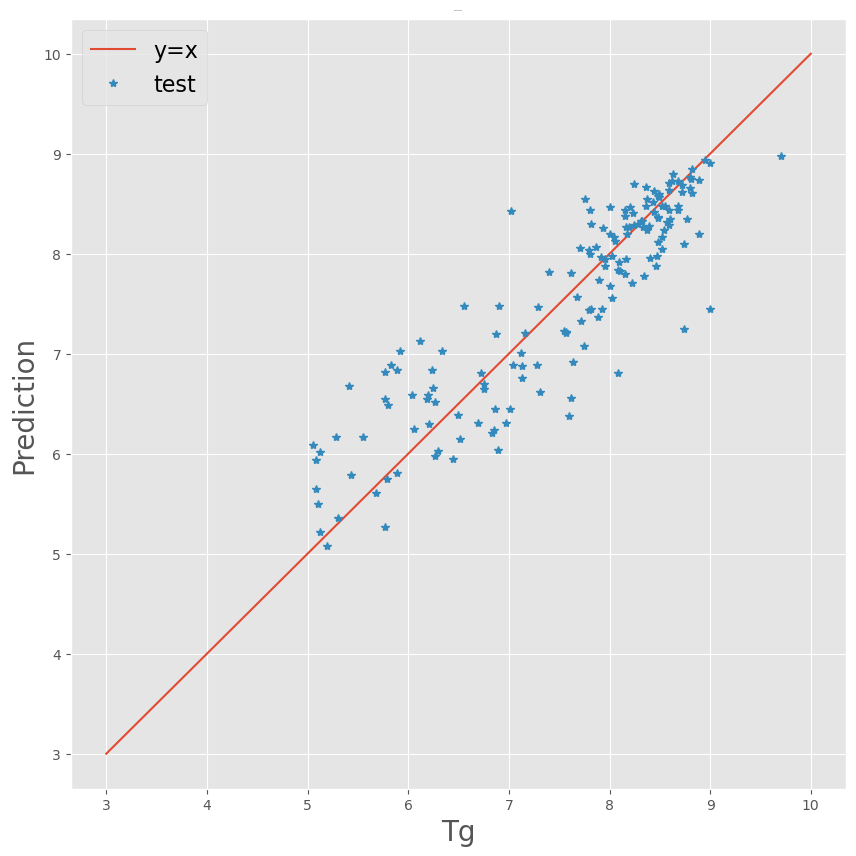

In [176]:
import matplotlib.pyplot as plt

y_true_test=T_test
y_pred_test=clf.predict(X_test)
legend=["y=x","test"]
fig = plt.figure(figsize=(10,10))
plt.plot(range(3,11), range(3,11),"-")
plt.plot(y_true_test, y_pred_test,"*")
plt.xlabel("Tg", fontsize=20)
plt.ylabel('Prediction', fontsize=20)
plt.legend(legend,fontsize=16)
plt.title('Scatter Plot', fontsize=1)
plt.show()

In [177]:
from sklearn.metrics import r2_score
print ("测试集 r^2 score",r2_score(T_test,y_pred_test))

测试集 r^2 score 0.7993052290196355


In [178]:
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_true=T_test
y_pred=clf.predict(X_test)
mean_absolute_error(y_true, y_pred_test)
#np.sqrt(mean_squared_error(y_true,y_pred))

0.3712964641340415

In [179]:
np.sqrt(mean_squared_error(y_true,y_pred_test))

0.49805807105184463

In [150]:
from sklearn.cross_decomposition import PLSRegression
clf = PLSRegression(n_components=12)
clf.fit(X_train, T_train)  # 训练模型

PLSRegression(n_components=12)

In [187]:
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn import linear_model
clf = linear_model.Ridge(alpha=40)
clf.fit(X_train, T_train)  # 训练模型

Ridge(alpha=40, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [175]:
from sklearn import linear_model
clf = linear_model.Lasso(max_iter=200, random_state=0, alpha=0.001)  # 设置正则化强度
clf.fit(X_train, T_train)  # 参数拟合
#print(regressor.coef_)  # 系数
#print(regressor.intercept_)  # 常量系数
#print(regressor.score(X, T))  # R^2，拟合优度
#print(regressor.get_params())  # 获取参数信息
#print(regressor.set_params(fit_intercept=False))  # 重
#print(regressor.predict(X))

/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.434e+01, tolerance: 1.697e-01
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.001, max_iter=200, random_state=0)

In [221]:
from sklearn.neighbors import KNeighborsRegressor
clf = KNeighborsRegressor (n_neighbors=3)
clf.fit (X_train,T_train)
train=clf.score(X_train,T_train)
test=clf.score(X_test, T_test)

In [ ]:
from sklearn.svm import SVR
clf = SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.000001, gamma=1e-3,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
clf.fit(X_train,T_train)

/PUBLIC/zyh/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.svm import SVR
clf = SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.000001, gamma=1e-2,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
clf.fit(X_train,T_train)

/PUBLIC/zyh/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [4]:
from rdkit import Chem
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, ShuffleSplit, GridSearchCV, cross_val_score, cross_validate
import os
import glob
from scipy.stats import norm
import math
import random
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# define the parameter values that should be searched
k_range = range(1, 31)
print (k_range)

range(1, 31)


In [6]:
param_grid = dict(n_neighbors=k_range)
print (param_grid)

{'n_neighbors': range(1, 31)}


In [7]:
knn = KNeighborsClassifier(n_neighbors=5)
# instantiate the grid
# 这里GridSearchCV的参数形式和cross_val_score的形式差不多，其中param_grid是parameter grid所对应的参数
# GridSearchCV中的n_jobs设置为-1时，可以实现并行计算（如果你的电脑支持的情况下）
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [ ]:
grid.fit(X, T.astype('int'))

/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/model_selection/_val

In [5]:
#构建多层感知器模型          并测试数据集划分、隐层层数、激活函数、算法对其性能的影响
test_accuracy=[]
train_accuracy=[]
random=[]
hidden_layer=[]
activation_function=[]
Solver=[]
num_data_sample=10                                               #考察数据训练和测试集的划分对性能的影响（随机划分样本的次数，random_state不同，则数据集划分结果不相同）
num=1
for random_state in range(5,15):
    for hidden_layer_sizes in range(2,18):                         #考察隐层神经元数目对性能的影响（单隐层）
        for activation in ["logistic","tanh","relu"]:               #考察激活函数对性能的影响
            for solver in ['lbfgs','sgd','adam']:                  #考察算法对性能的影响
                from sklearn.neural_network import MLPRegressor 
                from sklearn.model_selection import train_test_split
                train_X,test_X,train_T,test_T = train_test_split(X,T,test_size=0.15,random_state=random_state)
                clf = MLPRegressor(solver=solver,activation=activation,max_iter=100, alpha=1e-5,hidden_layer_sizes=(hidden_layer_sizes,), random_state=1)
                #print(clf)
                clf.fit(train_X,train_T)
                train=clf.score(train_X,train_T)
                test=clf.score(test_X, test_T)
                integrate=clf.score(X,T)
                train_accuracy.append(train)
                test_accuracy.append(test)
                random.append(random_state)
                hidden_layer.append(hidden_layer_sizes)
                activation_function.append(activation)
                Solver.append(solver)
    print(num)
    num +=1

/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilay

1


/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilay

2


/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilay

3


/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilay

4


/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilay

5


/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilay

6


/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilay

7


/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilay

8


/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilay

9


/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilay

10


/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [6]:
#初筛选性能较优的模型参数（选择测试集性能优的模型）
item=[]
for i in test_accuracy:
    if i>0.9:                       #该数值可以根据实际情况调整
        print(i,np.where(test_accuracy ==i) ) 
        index=np.where(test_accuracy ==i)[0][0]
        item.append(index)

In [7]:
#进一步筛选参数，排除欠拟合的情况
for index in item:
    if train_accuracy[index]>test_accuracy[index]:
        if train_accuracy[index]>0.90:
            if test_accuracy[index]>0.80:
                print(index)

In [8]:
#查看优异模型的各项参数及性能
index=234                      #根据上一步选择性查看
print(test_accuracy[index])
print(train_accuracy[index])
print(random[index])
print(hidden_layer[index])
print(activation_function[index])
print(Solver[index])
# 0.91 0.93 622  12 tanh  lbfgs
# 0.91 0.94 421  18 tanh  lbfgs
# 0.92 0.93 935  20 tanh  lbfgs  # 0.92 0.93 604  19 tanh  lbfgs  # 787 15 relu  lbfgs  # 0.92 0.93 81 12 tanh lbfgs  # 1031 12 tanh lbfgs
# 0.92 0.94 1677 20 tanh  lbfgs  √
# 0.93 0.93 1342 12 tanh  lbfgs  



-8.756974152257513e-06
-2.362836815095193e-09
6
12
logistic
lbfgs


In [9]:
#多层感知器  描述符
from sklearn.neural_network import MLPRegressor 
from sklearn.model_selection import train_test_split
train_X,test_X,train_T,test_T = train_test_split(X,T,test_size=0.10,random_state=1677)
clf = MLPRegressor(solver='lbfgs',activation='tanh', learning_rate='adaptive',max_iter=200,alpha=1e-5,hidden_layer_sizes=(20,), random_state=1)
print(clf)
clf.fit(train_X,train_T)                         

print("训练",clf.score(train_X,train_T))
print("测试",clf.score(test_X, test_T))
print("整体",clf.score(X,T))
print("random_state:529")


MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


/PUBLIC/apps/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


训练 2.03305533963416e-07
测试 -0.0037752241984672086
整体 -3.801847252837831e-05
random_state:529


In [10]:
#  均方根误差RMSE
#训练集
#index=0                                          
y_true_train=train_T
y_pred_train=clf.predict(train_X)
y_pred_train=np.transpose(y_pred_train)
print(len(y_true_train))
#print(y_pred)
N_train=len(train_T)                                   #样本量
print(N_train)
#print(pow(y_true_train[index]-y_pred_train[index],2))
#print(np.sum(pow(y_true_train[index]-y_pred_train[index],2), axis=0))
#print(np.sum(pow(y_true_train[index]-y_pred_train[index],2), axis=0)/N_train)
RMSE_train=np.sqrt(np.sum(pow(y_true_train-y_pred_train,2), axis=0)/N_train)      
print("训练集:",RMSE_train)
#np.sum([[0, 1], [0, 5]], axis=0)


#测试集
y_true_test=test_T
y_pred_test=clf.predict(test_X)
y_pred_test=np.transpose(y_pred_test)
print(len(y_true_test))
#print(y_pred)
N_test=len(test_T)                                   #样本量
print(N_test)
RMSE_test=np.sqrt(np.sum(pow(y_true_test-y_pred_test,2), axis=0)/N_test)    
print("测试集:",RMSE_test)
#np.sum([[0, 1], [0, 5]], axis=0)




#整体
y_true_all=T
y_pred_all=clf.predict(X)
y_pred_all=np.transpose(y_pred_all)
print(len(y_true_all))
#print(y_pred)
N_all=len(T)                                   #样本量
print(N_all)
RMSE_all=np.sqrt(np.sum(pow(y_true_all-y_pred_all,2), axis=0)/N_all)    
print("整体:",RMSE_all)
#np.sum([[0, 1], [0, 5]], axis=0)

3933
3933
训练集: [90.7330726 90.7330726 90.7330726 ... 90.7330726 90.7330726 90.7330726]
437
437
测试集: [91.5285281  91.5285281  91.5285281  91.5285281  91.5285281  91.5285281
 91.5285281  91.5285281  91.5285281  91.5285281  91.5285281  91.5285281
 91.5285281  91.5285281  91.5285281  91.5285281  91.5285281  91.5285281
 91.5285281  91.5285281  91.5285281  91.5285281  91.5285281  91.5285281
 91.5285281  91.5285281  91.5285281  91.5285281  91.52852807 91.5285281
 91.5285281  91.5285281  91.5285281  91.5285281  91.5285281  91.5285281
 91.5285281  91.5285281  91.5285281  91.5285281  91.5285281  91.5285281
 91.5285281  91.5285281  91.5285281  91.5285281  91.5285281  91.5285281
 91.5285281  91.5285281  91.5285281  91.5285281  91.5285281  91.5285281
 91.5285281  91.5285281  91.5285281  91.5285281  91.5285281  91.5285281
 91.5285281  91.5285281  91.5285281  91.5285281  91.5285281  91.5285281
 91.5285281  91.5285281  91.5285281  91.5285281  91.5285281  91.5285281
 91.5285281  91.5285281  91.5285281 

In [11]:
#皮尔逊相关系数r
#训练集
#index=0                                          #0-E,1-G,2-K
y_true_train=train_T
y_pred_train=clf.predict(train_X)
y_pred_train=np.transpose(y_pred_train)
y_mean_train=np.mean(y_true_train)
y_mean_pred_train=np.mean(y_pred_train)
print(y_mean_train)
print(len(y_true_train))
a=y_true_train-y_mean_train
b=y_pred_train-y_mean_pred_train
fenzi_train=np.sum(a*b,axis=0)
print(fenzi_train)
fenmu_train=np.sqrt(np.sum(pow(a,2),axis=0)*np.sum(pow(b,2),axis=0))
r_train=fenzi_train/fenmu_train
print("训练集：",r_train)

#测试集
#index=0                                          #0-E,1-G,2-K
y_true_test=test_T
y_pred_test=clf.predict(test_X)
y_pred_test=np.transpose(y_pred_test)
y_mean_test=np.mean(y_true_test)
y_mean_pred_test=np.mean(y_pred_test)
print(y_mean_test)
print(len(y_true_test))
a=y_true_test-y_mean_test
#print("a:",a)
b=y_pred_test-y_mean_pred_test
fenzi_test=np.sum(a*b,axis=0)
print(fenzi_test)
fenmu_test=np.sqrt(np.sum(pow(a,2),axis=0)*np.sum(pow(b,2),axis=0))
r_test=fenzi_test/fenmu_test
print("测试集：",r_test)

537.3106695004068
3933
[-1.43692024e-15 -1.43692024e-15 -1.43692024e-15 ... -1.43692024e-15
 -1.43692024e-15 -1.43692024e-15]
训练集： [-2.30634761e-17 -2.30634761e-17 -2.30634761e-17 ... -2.30634761e-17
 -2.30634761e-17 -2.30634761e-17]
531.6974352148742
437
[-2.41641559e-17 -2.41641559e-17 -2.41641559e-17 -2.41641559e-17
 -2.41641559e-17 -2.41641559e-17 -2.41641559e-17 -2.41641559e-17
 -2.41641559e-17 -2.41641559e-17 -2.41641559e-17 -2.41641559e-17
 -2.41641559e-17 -2.41641559e-17 -2.41641559e-17 -2.41641559e-17
 -2.41641559e-17 -2.41641559e-17 -2.41641559e-17 -2.41641559e-17
 -2.41641559e-17 -2.41641559e-17 -2.41641559e-17 -2.41641559e-17
 -2.41641559e-17 -2.41641559e-17 -2.41641559e-17 -3.49655201e-17
 -2.13587828e-17 -2.41641559e-17 -3.06693690e-17 -2.41641559e-17
 -2.41641559e-17 -2.41641559e-17 -2.41641559e-17 -2.41641559e-17
 -2.41641559e-17 -2.41641559e-17 -2.41641559e-17 -2.41641559e-17
 -2.41641559e-17 -2.41641559e-17 -2.41641559e-17 -2.41641559e-17
 -2.41641559e-17 -2.96529294e

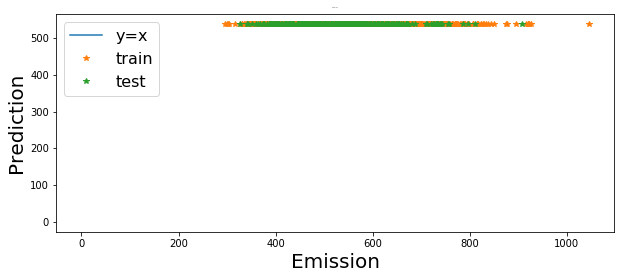

In [13]:
#查看散点图
import matplotlib.pyplot as plt
y_true_train=train_T
y_pred_train=clf.predict(train_X)
y_true_test=test_T
y_pred_test=clf.predict(test_X)
legend=["y=x","train","test"]
fig = plt.figure(figsize=(10,4))
plt.plot(range(1), range(1),"-")
plt.plot(y_true_train, y_pred_train,"*")
plt.plot(y_true_test, y_pred_test,"*")
plt.xlabel("Emission", fontsize=20)
plt.ylabel('Prediction', fontsize=20)
plt.legend(legend,fontsize=16)
plt.title('Scatter Plot', fontsize=1)
plt.show()

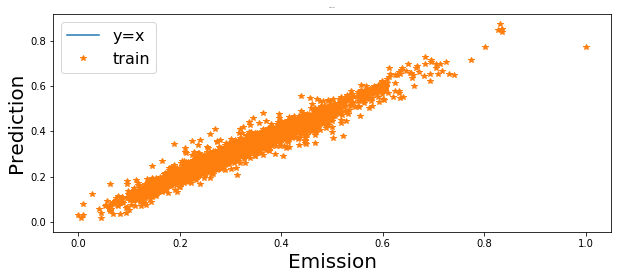

In [14]:
#查看散点图
import matplotlib.pyplot as plt
y_true_train=train_T
y_pred_train=clf.predict(train_X)

legend=["y=x","train"]
fig = plt.figure(figsize=(10,4))
plt.plot(range(1), range(1),"-")
plt.plot(y_true_train, y_pred_train,"*")
plt.xlabel("Emission", fontsize=20)
plt.ylabel('Prediction', fontsize=20)
plt.legend(legend,fontsize=16)
plt.title('Scatter Plot', fontsize=1)
plt.show()

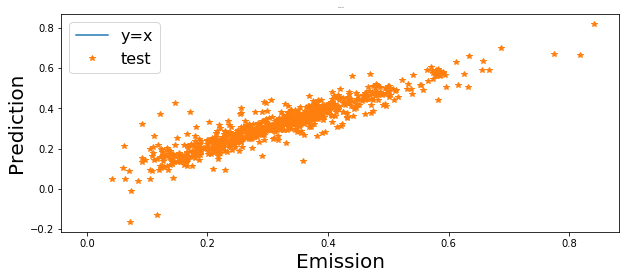

In [15]:
#查看散点图
import matplotlib.pyplot as plt

y_true_test=test_T
y_pred_test=clf.predict(test_X)
legend=["y=x","test"]
fig = plt.figure(figsize=(10,4))
plt.plot(range(1), range(1),"-")
plt.plot(y_true_test, y_pred_test,"*")
plt.xlabel("Emission", fontsize=20)
plt.ylabel('Prediction', fontsize=20)
plt.legend(legend,fontsize=16)
plt.title('Scatter Plot', fontsize=1)
plt.show()